In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_conv_model3, get_vector_conv_model3, get_scalar_conv_model4, get_vector_conv_model4
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'cifar10'
epochs = 10
num_tries = 30

train_dataset, test_dataset = get_test_datasets(dataset_name, feature_range=(0,1))  
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([32, 32, 3], [10])


# ConvNets C-P-C, with subsampled input

### Scalar

Average elapsed training time: 213.81780 sec
Last measures: [0.08629129827022552, 0.08055589348077774, 0.08129526674747467, 0.07962153106927872, 0.08544667065143585, 0.07752630859613419, 0.07924439013004303, 0.08226781338453293, 0.07642298191785812, 0.08542955666780472, 0.08349493145942688, 0.07572433352470398, 0.08184303343296051, 0.08411603420972824, 0.0805678516626358, 0.07857492566108704, 0.07737232744693756, 0.08730091899633408, 0.080233134329319, 0.08344756066799164, 0.08352629840373993, 0.08054392784833908, 0.07744814455509186, 0.08341851830482483, 0.08053892105817795, 0.08167710900306702, 0.08199305087327957, 0.0787288174033165, 0.08370699733495712, 0.08504194021224976]
Loss history average: [0.08737142 0.08519555 0.08425592 0.08363143 0.08315259 0.0826939
 0.08231626 0.08205993 0.08182101 0.08160095]
Measure history average: [0.08574237 0.08454804 0.08379053 0.08328468 0.08283128 0.08238589
 0.0820884  0.08184589 0.0816451  0.08144668]
Measure history worst: [0.08895592 0.0882

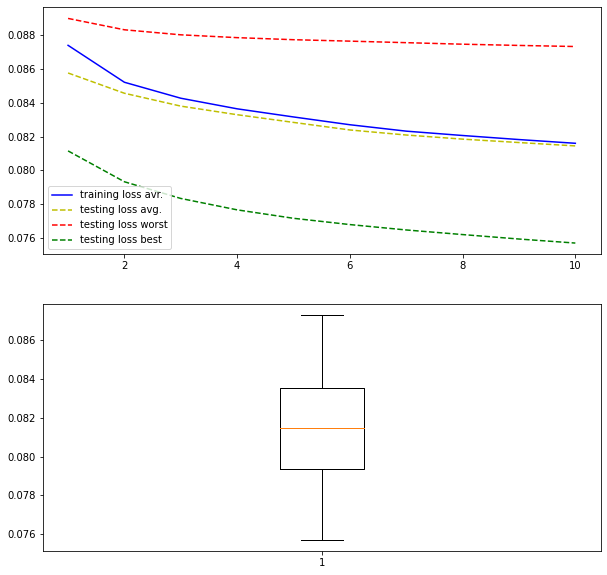

In [3]:
model_fun = lambda: get_scalar_conv_model3(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

### Vector

Average elapsed training time: 309.11616 sec
Last measures: [0.09000012278556824, 0.08512046933174133, 0.0835043340921402, 0.0852317363023758, 0.09000012278556824, 0.08668089658021927, 0.09000012278556824, 0.08322087675333023, 0.08759574592113495, 0.08407662063837051, 0.08435512334108353, 0.08336639404296875, 0.08569521456956863, 0.0837986096739769, 0.09000012278556824, 0.08758140355348587, 0.0879034548997879, 0.08549974858760834, 0.08814283460378647, 0.0826096460223198, 0.09000012278556824, 0.09000012278556824, 0.08719702064990997, 0.08736996352672577, 0.08580323308706284, 0.08000905811786652, 0.08629807084798813, 0.08693565428256989, 0.09000012278556824, 0.08680929243564606]
Loss history average: [0.0894867  0.08834132 0.08786512 0.0875764  0.08734634 0.08717968
 0.08704293 0.08690425 0.08677063 0.08664253]
Measure history average: [0.08865211 0.08797429 0.08761126 0.08736681 0.08715643 0.08699979
 0.08687352 0.08673837 0.08658675 0.08649354]
Measure history worst: [0.09000012 0.0900

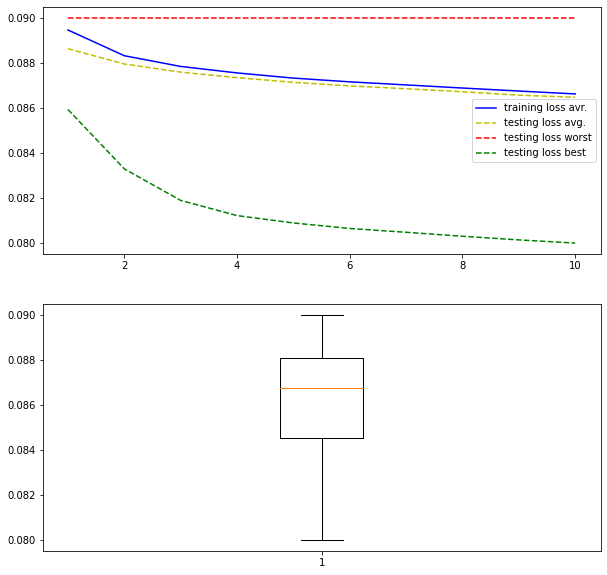

In [4]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

Average elapsed training time: 311.77680 sec
Last measures: [0.08258351683616638, 0.08669520169496536, 0.08881112188100815, 0.09000002592802048, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.08383487910032272, 0.08432012051343918, 0.09000012278556824, 0.09000012278556824, 0.08164014667272568, 0.09000012278556824, 0.08789921551942825, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.08844709396362305, 0.0840582400560379, 0.07923147082328796, 0.08605088293552399, 0.08113663643598557, 0.09000012278556824, 0.09000012278556824, 0.09000012278556824, 0.07915056496858597, 0.09000012278556824, 0.08731400221586227, 0.08797133713960648, 0.08816356211900711]
Loss history average: [0.08950105 0.08862579 0.08821994 0.08798549 0.08783408 0.08771773
 0.08761964 0.08746973 0.0873898  0.08732562]
Measure history average: [0.08890379 0.08832537 0.08802504 0.08784161 0.0877153  0.08761267
 0.08749051 0.08736715 0.08730129 0.08724366]
Measure history worst: [0.09000012 0.

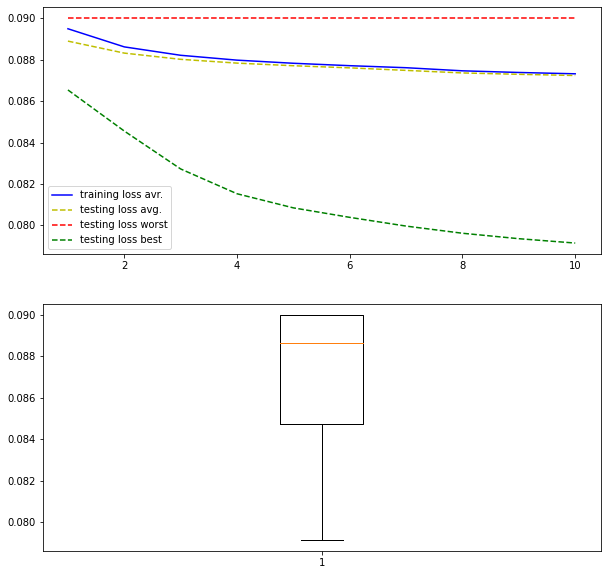

In [5]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

# ConvNets C-C-P, with subsampled input

### Scalar

Average elapsed training time: 215.52943 sec
Last measures: [0.08282926678657532, 0.08212217688560486, 0.08384272456169128, 0.08670216798782349, 0.08389098942279816, 0.08594422042369843, 0.08149810135364532, 0.0853324830532074, 0.08376256376504898, 0.08604732155799866, 0.08539178967475891, 0.08174286782741547, 0.0816141813993454, 0.08430539071559906, 0.07787362486124039, 0.08144845813512802, 0.08086454123258591, 0.08165693283081055, 0.0828683003783226, 0.08681893348693848, 0.08373282104730606, 0.08462569862604141, 0.08255001157522202, 0.08441126346588135, 0.08669350296258926, 0.0859476774930954, 0.08710231631994247, 0.08058997243642807, 0.0809457004070282, 0.08509206771850586]
Loss history average: [0.08838539 0.08690526 0.08611776 0.08556269 0.08505936 0.08463644
 0.08435354 0.08410738 0.08390711 0.08370889]
Measure history average: [0.08741297 0.08643152 0.08579575 0.08528598 0.08479621 0.0844554
 0.08419622 0.08398419 0.08378469 0.08360827]
Measure history worst: [0.0886351  0.08812

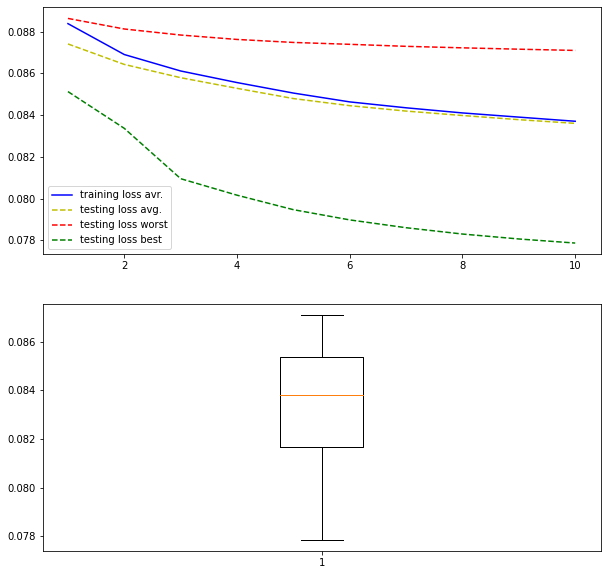

In [6]:
model_fun = lambda: get_scalar_conv_model4(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

### Vector

Average elapsed training time: 377.37761 sec
Last measures: [0.08609582483768463, 0.08628882467746735, 0.08695124089717865, 0.08557038754224777, 0.0860973373055458, 0.08670898526906967, 0.08608602732419968, 0.08623012155294418, 0.08740170300006866, 0.08641421794891357, 0.08611033111810684, 0.08736955374479294, 0.08722510188817978, 0.0864291712641716, 0.08814666420221329, 0.08608944714069366, 0.08645343035459518, 0.08675497025251389, 0.08665283024311066, 0.08677887171506882, 0.08640948683023453, 0.08668186515569687, 0.08692458271980286, 0.08616612106561661, 0.08670902997255325, 0.08713369071483612, 0.08622436225414276, 0.08573096245527267, 0.08682853728532791, 0.08662167936563492]
Loss history average: [0.08981881 0.08876666 0.08809713 0.08767555 0.0873899  0.08718619
 0.08701964 0.08688556 0.08676721 0.08666777]
Measure history average: [0.08926139 0.08830765 0.08780475 0.08745522 0.08721318 0.08702837
 0.0868851  0.08676582 0.08666602 0.08657618]
Measure history worst: [0.0896078  0.0

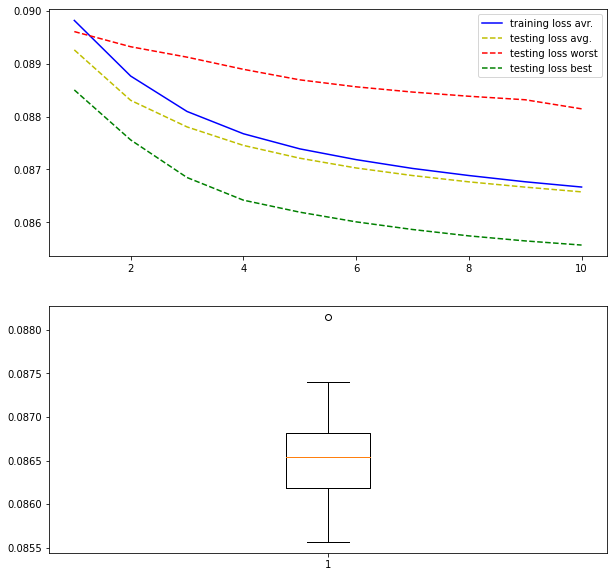

In [7]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)

Average elapsed training time: 353.49578 sec
Last measures: [0.08674217760562897, 0.08683741837739944, 0.08628334850072861, 0.08772478997707367, 0.08680186420679092, 0.08688389509916306, 0.08638312667608261, 0.08825784176588058, 0.08813314139842987, 0.08679544180631638, 0.08641272038221359, 0.08812256157398224, 0.08628464490175247, 0.08623364567756653, 0.08726678043603897, 0.08625266700983047, 0.08725589513778687, 0.08697658032178879, 0.08719290047883987, 0.08601666241884232, 0.08707958459854126, 0.08578567206859589, 0.08750525861978531, 0.08674990385770798, 0.08795740455389023, 0.08601178973913193, 0.08760196715593338, 0.08700752258300781, 0.08611930906772614, 0.08704967051744461]
Loss history average: [0.08979051 0.08883004 0.08827749 0.08797251 0.08772827 0.08752367
 0.08736329 0.08724574 0.08713839 0.08702937]
Measure history average: [0.08921968 0.08845417 0.08804361 0.08778926 0.08754557 0.08736364
 0.08723323 0.08713683 0.0870275  0.08692421]
Measure history worst: [0.08928145 0

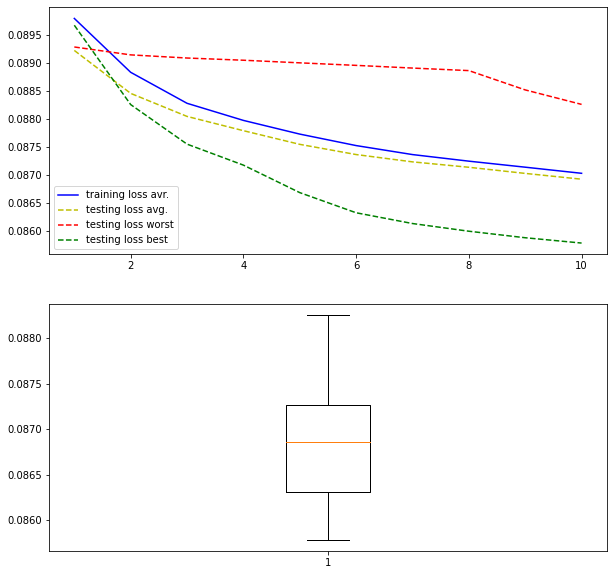

In [8]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_data=True)